# 공공데이터 상권 정보 분석해보기
## 필요한 라이브러리 불러오기

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns

## 시각화를 위한 폰트 설정

In [91]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

In [92]:
# 폰트가 선명하게 보이기 위해
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [93]:
df = pd.read_csv("../data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
df.shape

(91335, 39)

## 데이터 미리보기

In [94]:
# Shift + tab 키를 누르면 docstring을 볼 수 있음
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [95]:
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [96]:
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
9631,19936274,광제당탕제원,NaN,S,의료,S02,약국/한약방,S02A03,탕제원,G47859,...,3111011800107600007022741,NaN,울산광역시 중구 화합로 339,681260.0,44528.0,NaN,NaN,NaN,129.340994,35.556385


## 데이터 요약하기

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [98]:
# 컬럼명만 출력해봅니다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [99]:
# 데이터 타입만 출력합니다
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치

In [100]:
df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False


In [101]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<Axes: >

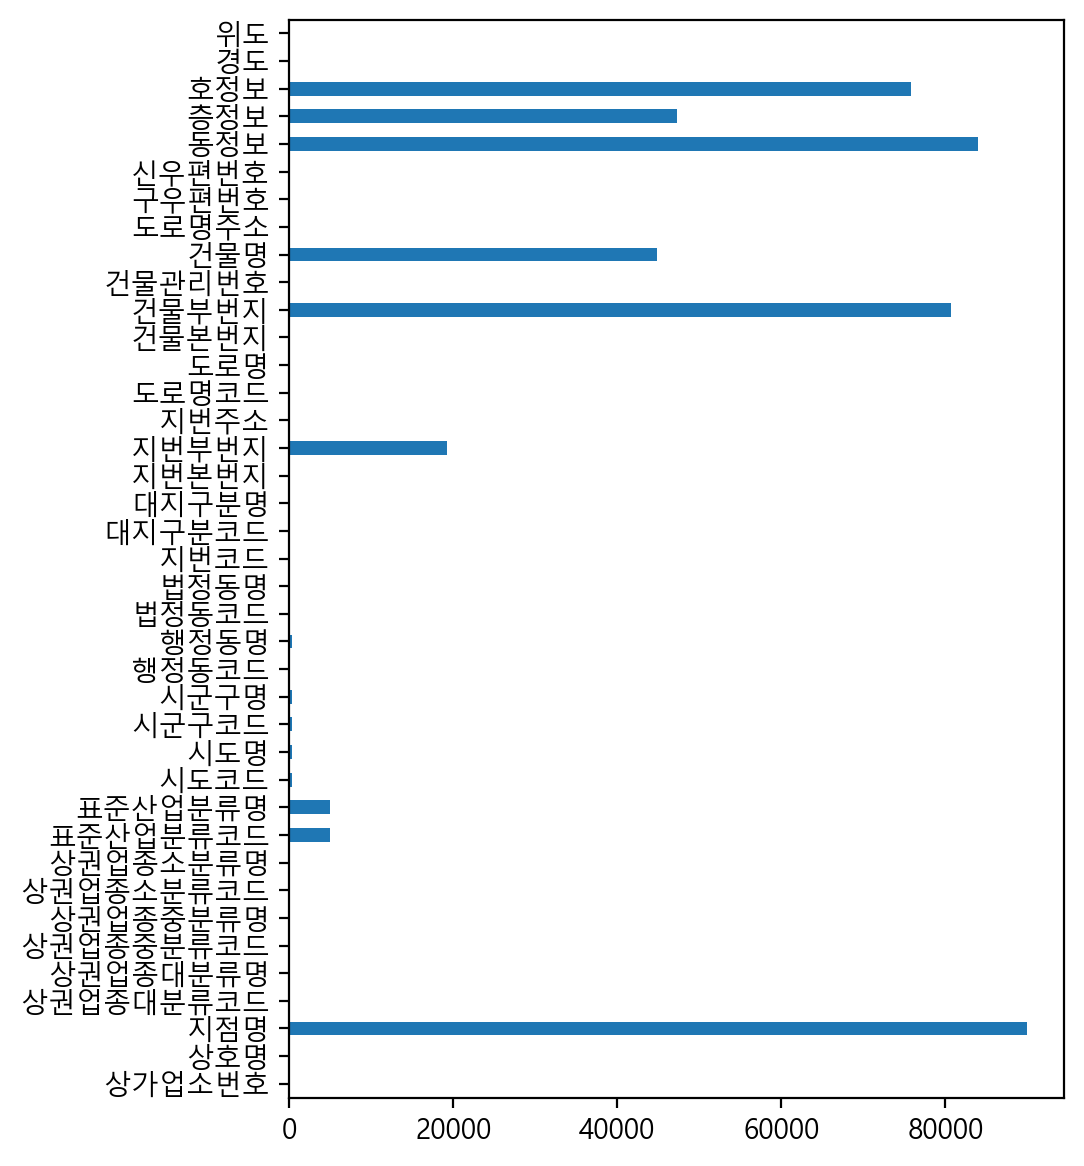

In [102]:
null_count.plot.barh(figsize=(5, 7))

In [103]:
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경하기

In [104]:
df_null_count.columns = ['컬럼명', '결측치수']
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 정렬하기

In [105]:
# 결측치수가 많은 순으로 상위 10개만 출력합니다

df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


## 특정 컬럼만 불러오기

In [106]:
# NaN == Not a Number의 약자로 결측치를 의미합니다.

df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [107]:
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [108]:
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## 제거하기

In [109]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기
### 기초 통계 수치

In [111]:
# 평균값

df["위도"].mean()

36.62471119236685

In [112]:
# 중앙값

df["위도"].median()

37.2346523177033

In [113]:
# 최댓값

df["위도"].max()

38.4996585705598

In [114]:
# 최솟값

df["위도"].min()

33.2192896688307

In [115]:
# 개수

df["위도"].count()

91335

### 기초통계값 요약하기

In [116]:
# 위도를 describe로 요약해봅니다.

df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [117]:
# 2개의 컬럼을 describe 해봅니다

df[["경도", "위도"]].describe()

,경도,위도
count,91335.000000,91335.000000
mean,127.487524,36.624711
std,0.842877,1.041361
min,124.717632,33.219290
25%,126.914297,35.811830
50%,127.084550,37.234652
75%,128.108919,37.507463
max,130.909912,38.499659


In [118]:
# describe로 문자열 데이터타입의 요약을 봅니다.

df.describe(include="object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


In [119]:
df.describe(include="all")

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
count,9.133500e+04,91335,91335,91335,91335,91335,91335,91335,90956,90956.000000,...,91335,9.133500e+04,91335,91335.000000,91335,91335,91323.000000,91333.00000,91335.000000,91335.000000
unique,NaN,56910,1,1,5,5,34,34,17,NaN,...,53118,NaN,16610,NaN,54142,54031,NaN,NaN,NaN,NaN
top,NaN,리원,S,의료,S01,병원,S02A01,약국,경기도,NaN,...,서울특별시 동대문구 제기동 965-1,NaN,서울특별시 강남구 강남대로,NaN,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10,NaN,NaN,NaN,NaN
freq,NaN,152,91335,91335,60774,60774,18964,18964,21374,NaN,...,198,NaN,326,NaN,198,198,NaN,NaN,NaN,NaN
mean,2.121818e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32898.381877,...,NaN,3.293207e+11,NaN,251.200482,NaN,NaN,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12985.393171,...,NaN,1.297391e+11,NaN,477.456487,NaN,NaN,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11110.000000,...,NaN,1.111020e+11,NaN,0.000000,NaN,NaN,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26350.000000,...,NaN,2.635042e+11,NaN,29.000000,NaN,NaN,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41117.000000,...,NaN,4.111743e+11,NaN,92.000000,NaN,NaN,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43113.000000,...,NaN,4.311332e+11,NaN,257.000000,NaN,NaN,602811.000000,46044.00000,128.108919,37.507463


### 중복제거한 값 보기

In [120]:
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [121]:
df["상권업종대분류명"].nunique()

1

In [122]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [123]:
df["상권업종중분류명"].nunique()

5

In [124]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [125]:
df["상권업종소분류명"].nunique()

34

In [126]:
len(df["상권업종소분류명"].unique())

34

### 그룹화된 요약값 보기

In [127]:
# value_counts를 사용하면 카테고리 형태의 데이터 개수를 세어볼 수 있습니다.

df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [128]:
city = df["시도명"].value_counts()
city

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

In [129]:
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

시도명
경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: proportion, dtype: float64

<Axes: ylabel='시도명'>

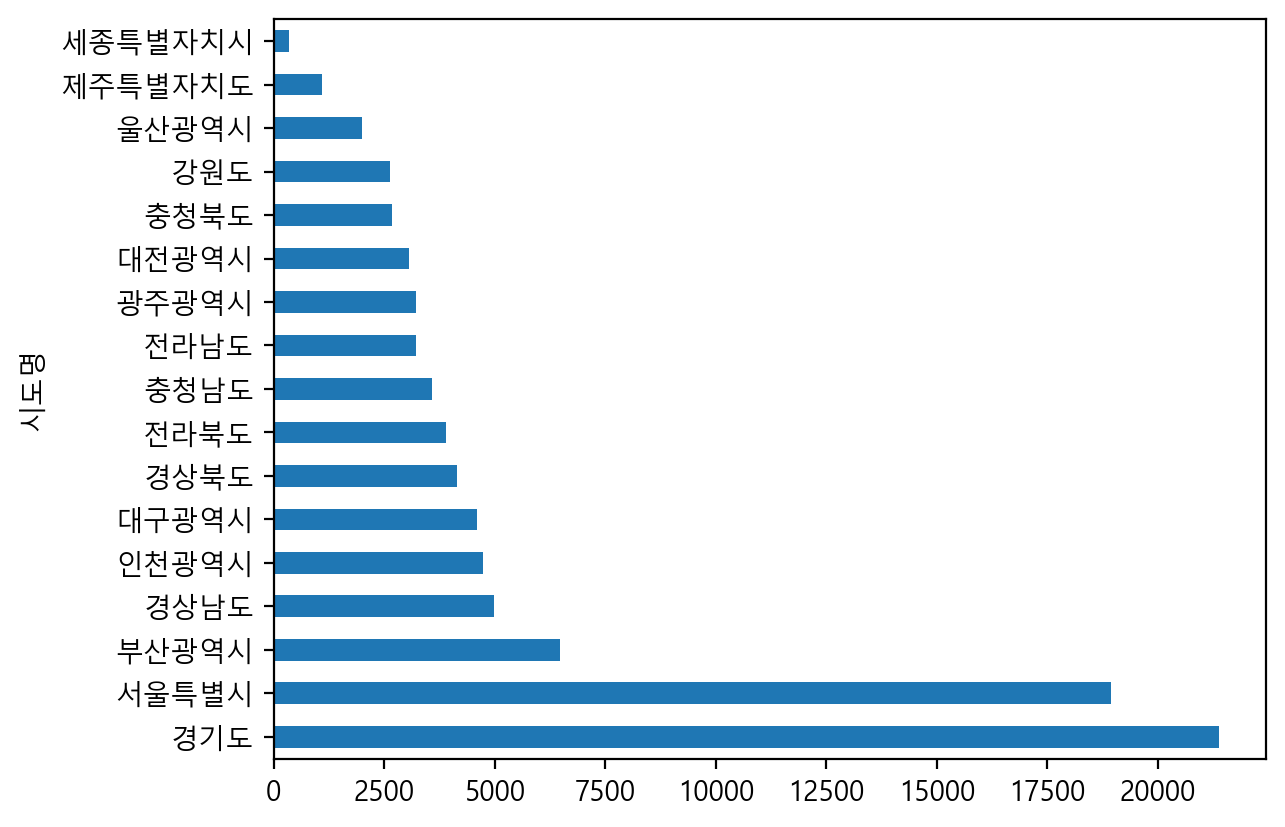

In [130]:
city.plot.barh()

<Axes: ylabel='proportion'>

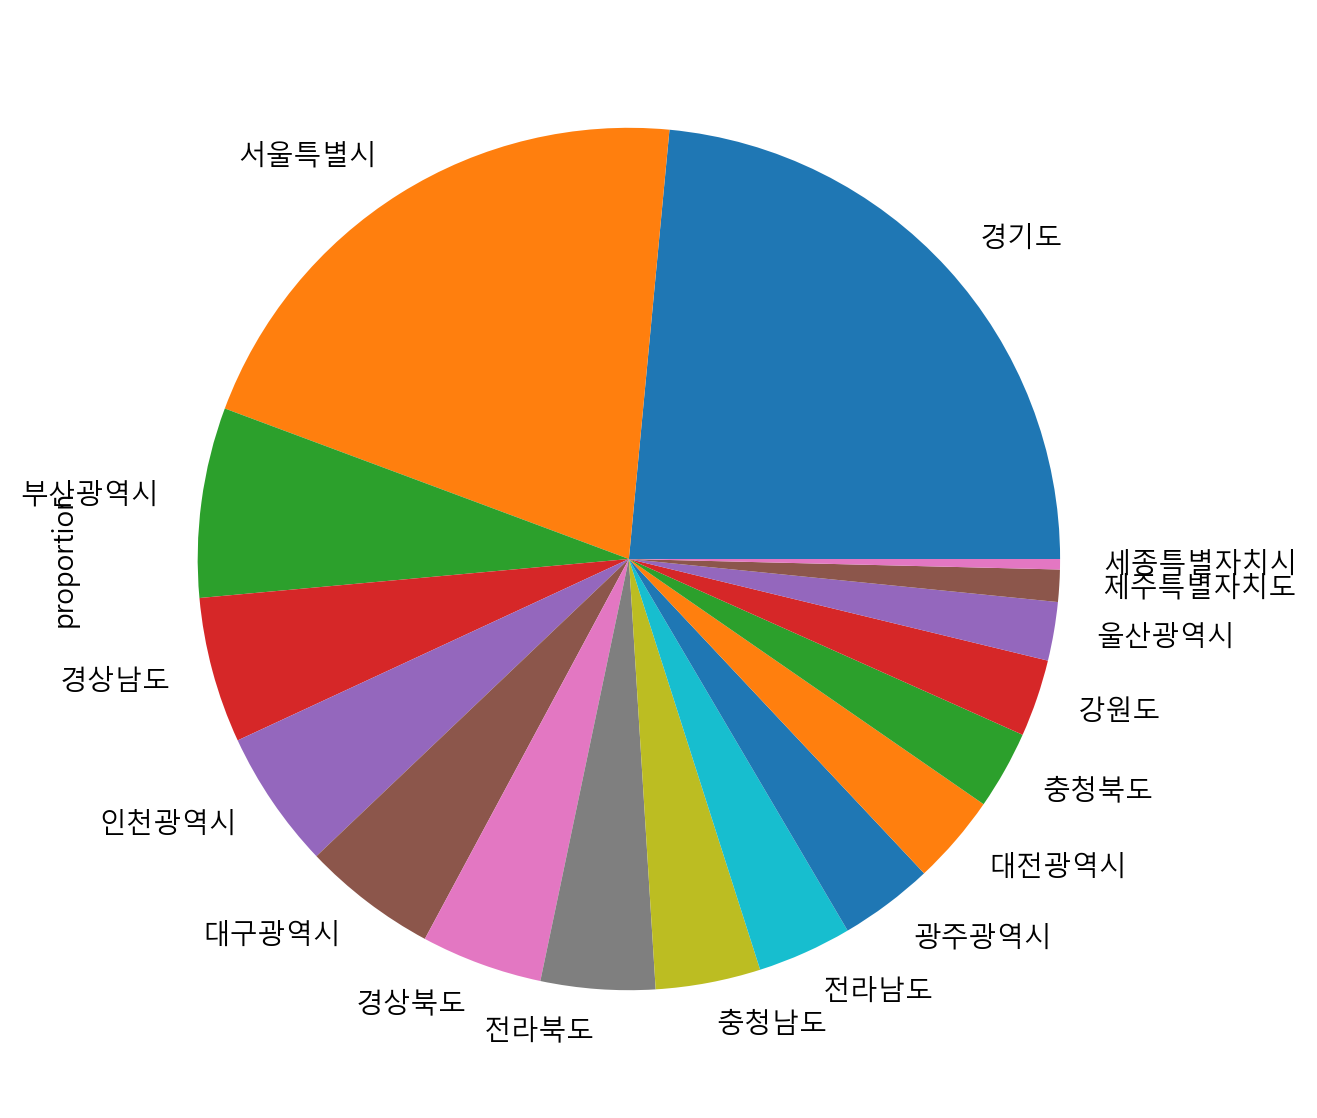

In [131]:
city_normalize.plot.pie(figsize=(7, 7))

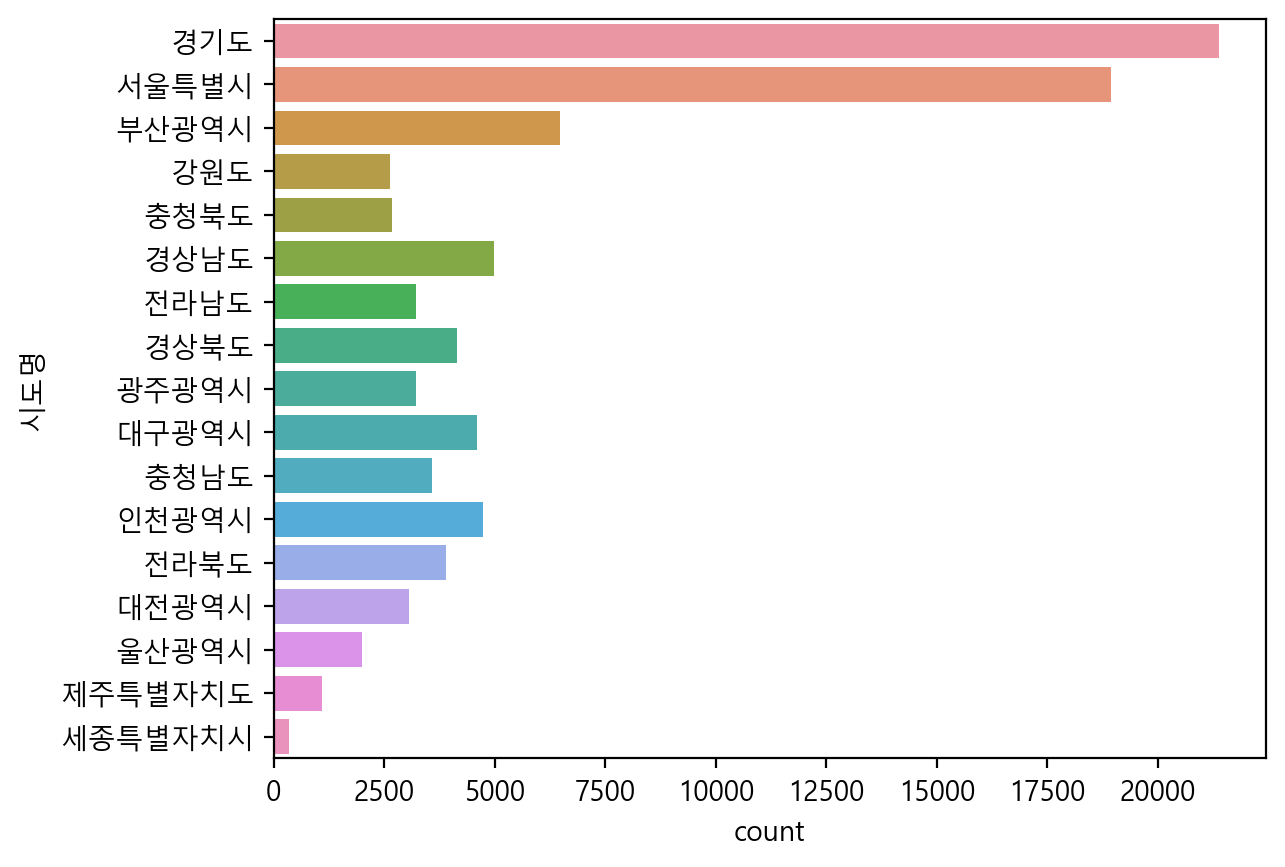

In [132]:
# seaborn의 countplot으로 그려봅니다.
c = sns.countplot(data=df, y="시도명")

In [133]:
df["상권업종대분류명"].value_counts()

상권업종대분류명
의료    91335
Name: count, dtype: int64

In [134]:
c = df["상권업종중분류명"].value_counts()
c

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [135]:
n = df["상권업종중분류명"].value_counts(normalize=True)
n

상권업종중분류명
병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: proportion, dtype: float64

<Axes: xlabel='상권업종중분류명'>

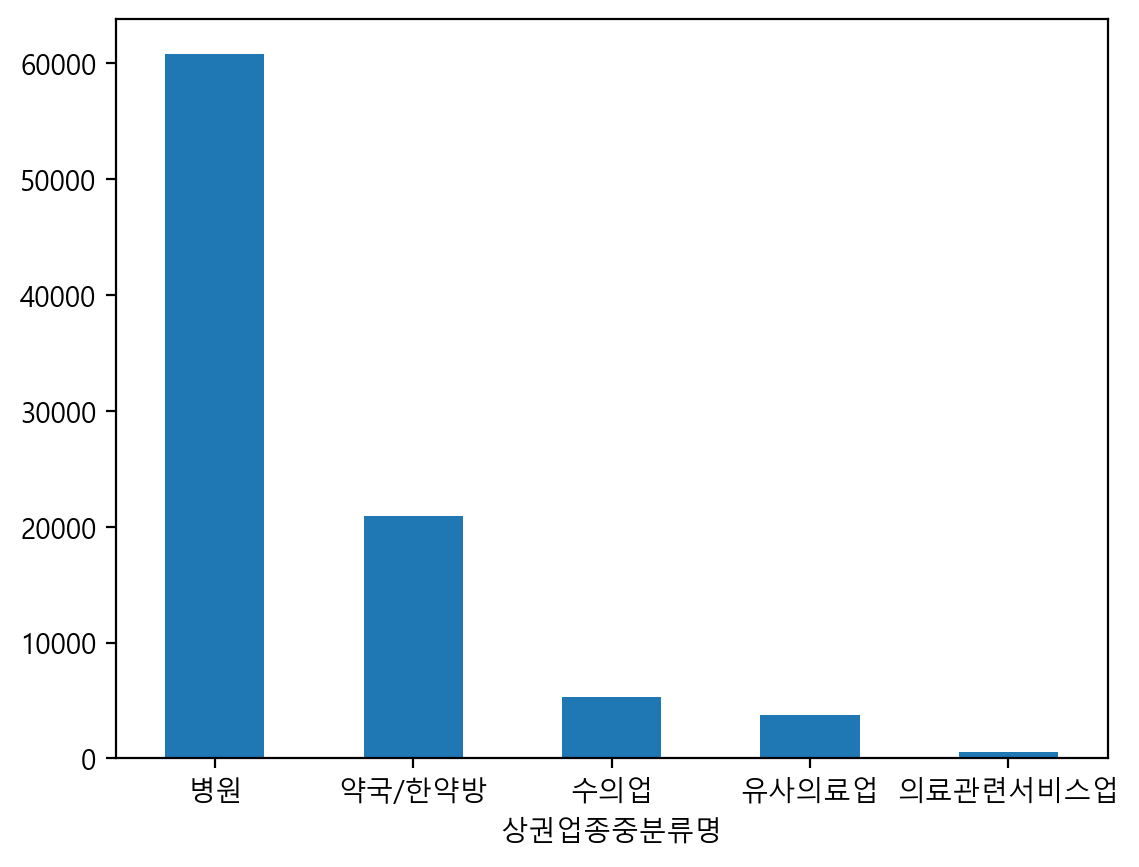

In [136]:
c.plot.bar(rot=0)

<Axes: ylabel='proportion'>

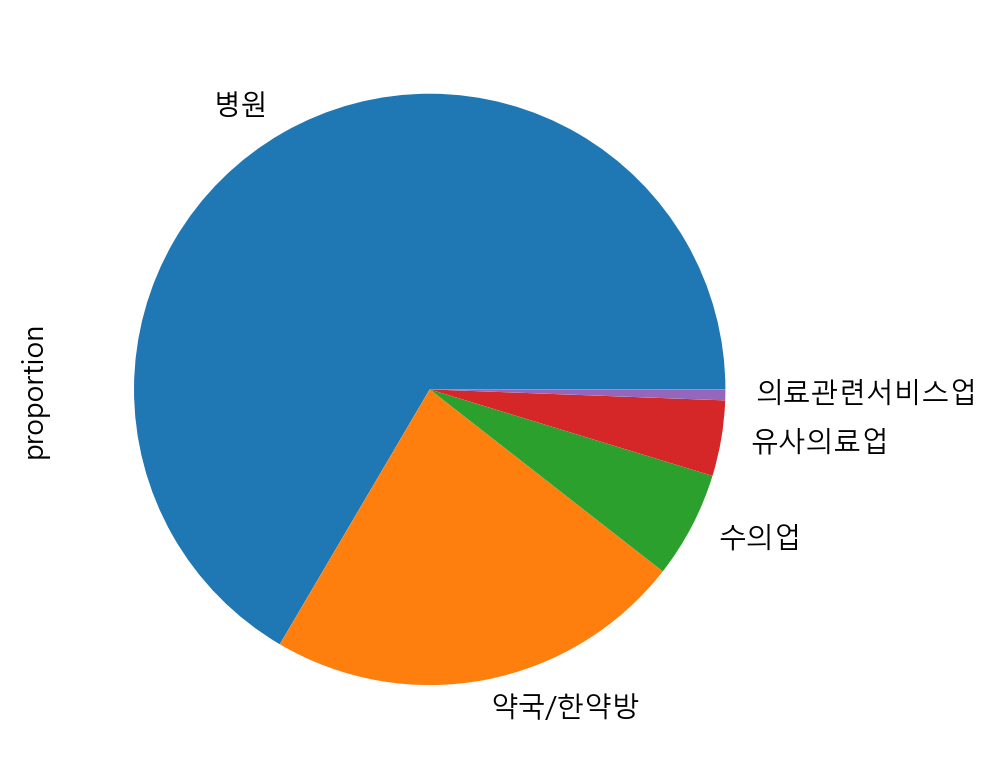

In [137]:
n.plot.pie()

<Axes: xlabel='count', ylabel='상권업종중분류명'>

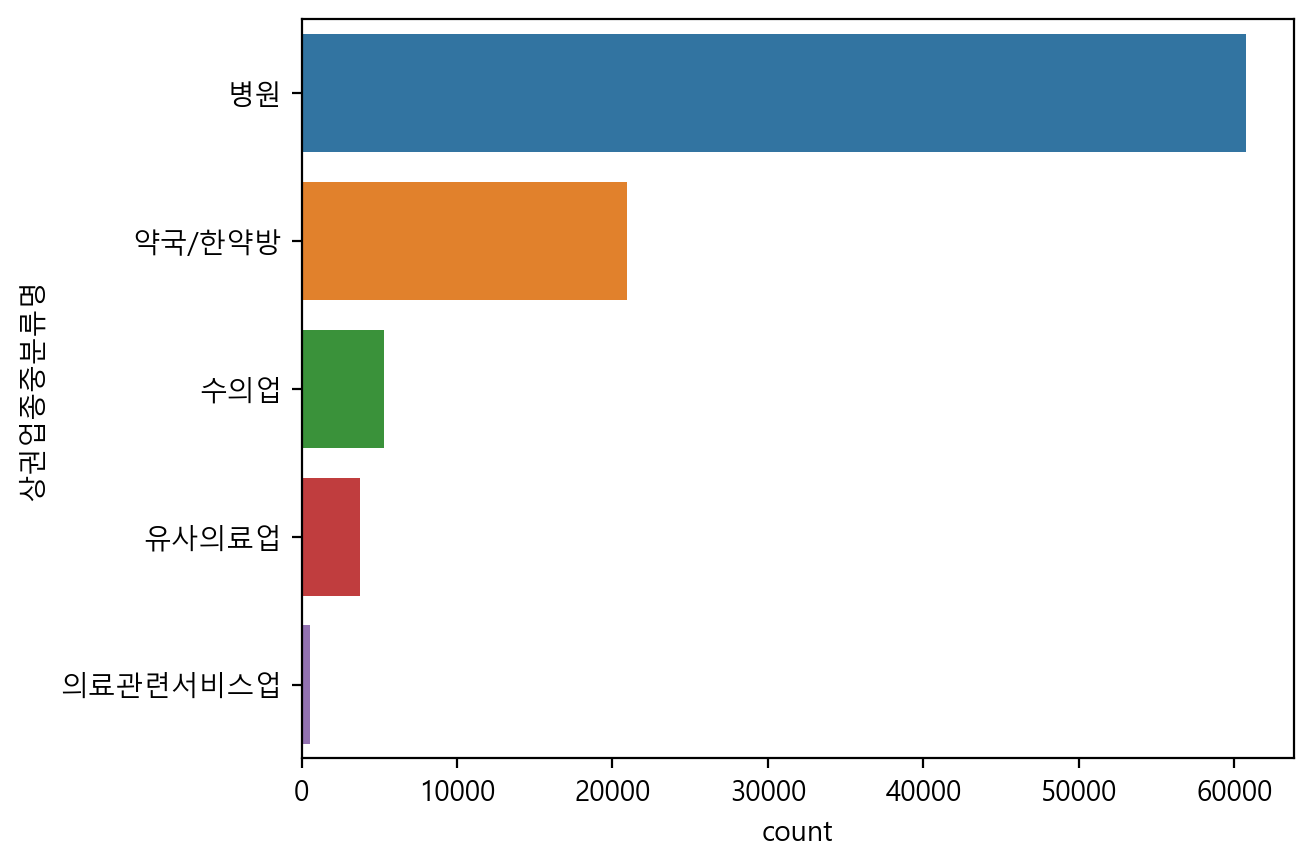

In [138]:
sns.countplot(data=df, y="상권업종중분류명")

In [139]:
c = df["상권업종소분류명"].value_counts()
c

상권업종소분류명
약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: count, dtype: int64

<Axes: xlabel='상권업종소분류명'>

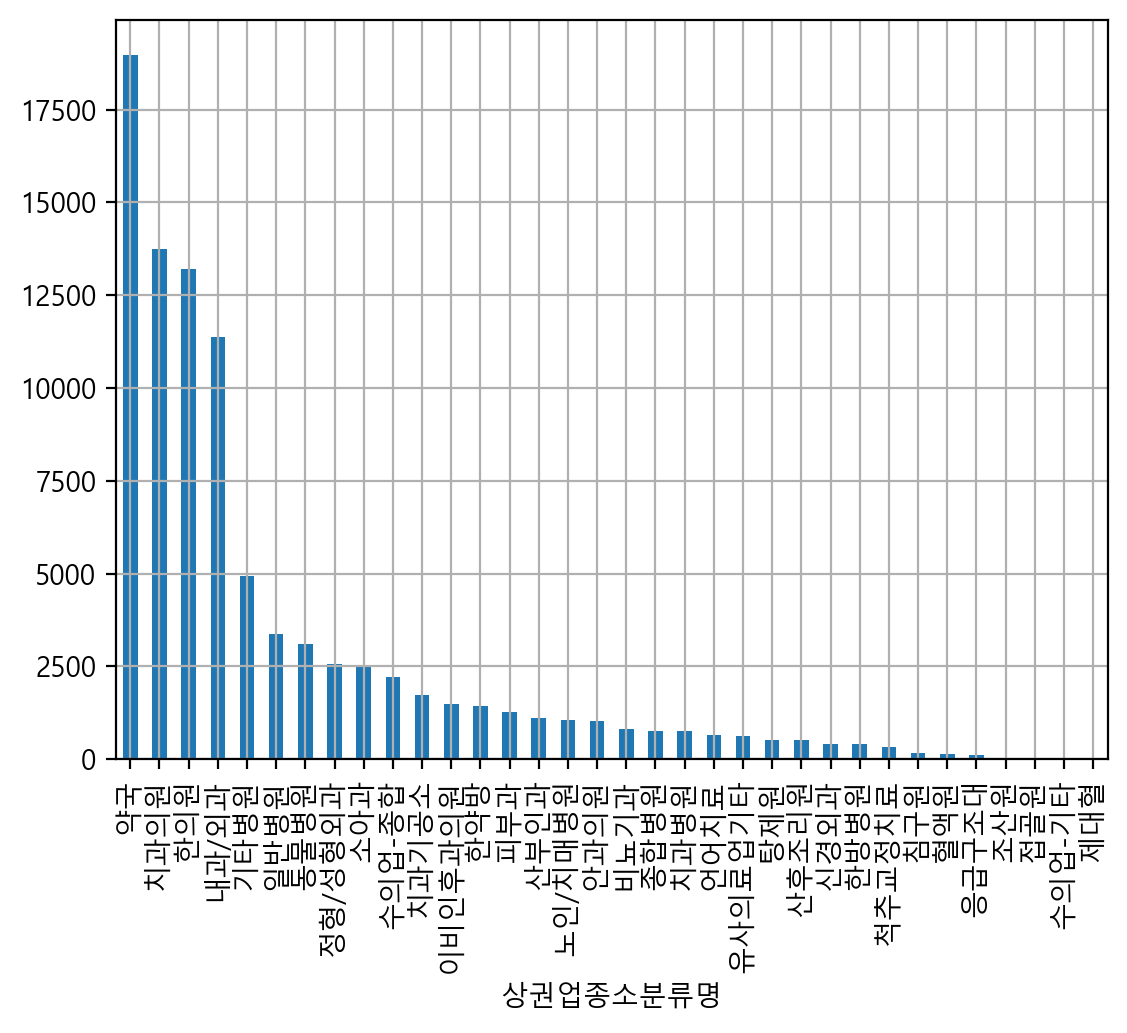

In [140]:
c.plot.bar(grid=True)

## 데이터 색인하기

In [141]:
# copy를 통해 넣어주면 df_medical에 변동이 있더라도 df에는 영향이 없음

df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,강원도,42110.0,...,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,충청북도,43111.0,...,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,경상남도,48890.0,...,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,전라남도,46830.0,...,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,4683035023102960000000001,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


In [142]:
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"]

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [143]:
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [144]:
m = df["상권업종대분류명"] == "의료"
df.loc[m, "상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [145]:
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
22,21013731,세종언어치료센터,S,의료,S03,유사의료업,S03B07,언어치료,부산광역시,26410.0,...,부산광역시 금정구 구서동 84-1,264102000010,부산광역시 금정구 중앙대로,1817,2641010700100840001017686,부산광역시 금정구 중앙대로 1817-11,609310.0,46273.0,129.091662,35.246528
40,20933900,고려수지침학회,S,의료,S03,유사의료업,S03B03,침구원,경상남도,48123.0,...,경상남도 창원시 성산구 상남동 5-2,481234784088,경상남도 창원시 성산구 마디미로4번길,9,4812312700100050002026799,경상남도 창원시 성산구 마디미로4번길 9,642832.0,51495.0,128.684678,35.224113
97,21717820,청명원,S,의료,S03,유사의료업,S03B09,유사의료업기타,충청북도,43760.0,...,충청북도 괴산군 청안면 금신리 241,437604538132,충청북도 괴산군 청안면 금신로1길,93,4376037022102410000007293,충청북도 괴산군 청안면 금신로1길 93,367831.0,28050.0,127.635740,36.768935
102,21865854,응급환자이송센터,S,의료,S03,유사의료업,S03B01,응급구조대,대전광역시,30140.0,...,대전광역시 중구 대사동 248-237,301404295026,대전광역시 중구 계룡로921번길,40,3014011000102480237013097,대전광역시 중구 계룡로921번길 40,301846.0,34946.0,127.417693,36.321801
108,21914637,태화아동발달지원센터,S,의료,S03,유사의료업,S03B07,언어치료,대전광역시,30140.0,...,대전광역시 중구 문화동 27,301404295402,대전광역시 중구 보문산로333번길,29,3014011600100270000008172,대전광역시 중구 보문산로333번길 29,301130.0,35020.0,127.412725,36.312953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91300,16131218,으뜸치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,경상남도,48170.0,...,경상남도 진주시 수정동 39-11,481704797625,경상남도 진주시 향교로18번길,8,4817011600100390011004490,경상남도 진주시 향교로18번길 8,660180.0,52753.0,128.084600,35.197029
91310,16199325,보령치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,서울특별시,11290.0,...,서울특별시 성북구 동소문동4가 103-11,112903107003,서울특별시 성북구 동소문로,47,1129010700101030014050661,서울특별시 성북구 동소문로 47-15,136821.0,2832.0,127.010602,37.591455
91311,16199088,점프셈교실,S,의료,S03,유사의료업,S03B09,유사의료업기타,경상북도,47130.0,...,경상북도 경주시 황성동 446,471304715895,경상북도 경주시 용담로104번길,16,4713012400104460000024894,경상북도 경주시 용담로104번길 16,780954.0,38084.0,129.211755,35.865600
91319,16108560,씨앤디자인치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,서울특별시,11545.0,...,서울특별시 금천구 가산동 60-25,115453116013,서울특별시 금천구 벚꽃로,234,1154510100100600025000001,서울특별시 금천구 벚꽃로 234,153798.0,8513.0,126.886122,37.475986


In [146]:
df_medi.shape

(3774, 29)

In [147]:
df["상호명"].value_counts().head(10)

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

In [148]:
df_medi["상호명"].value_counts().head(10)

상호명
리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: count, dtype: int64

### 여러 조건으로 색인하기

In [149]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_drug

df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")]
print(df_seoul_drug.shape)
df_seoul_drug.head(1)

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
